In [1]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00


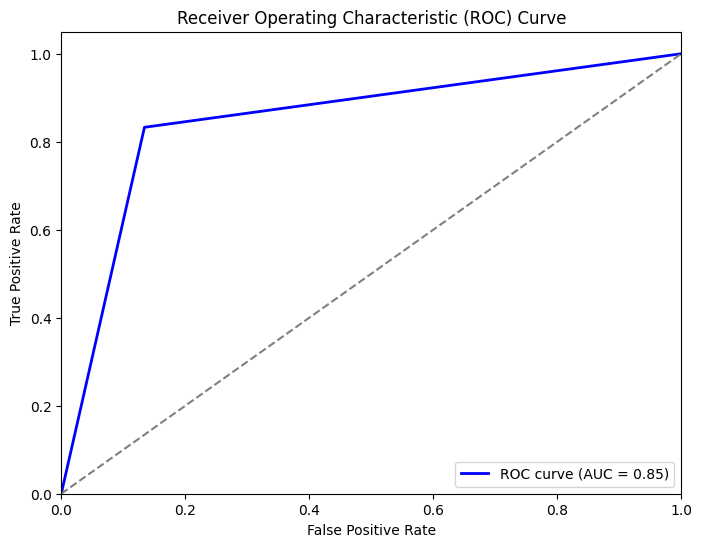

accuracy: 0.84932
precision: 0.8497017489767759
recall: 0.84932
f1: 0.8492788666352049
specificity: 0.86584
fpr: 0.13415999999999995
log_loss: 5.431057692672173
f2_score: 0.8493963223513015
mcc: 0.6990216447366056
gmean: 0.8575402199314036
confusion_matrix: [[10823  1677]
 [ 2090 10410]]
roc_auc: 0.84932


In [5]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    fpr_specificity = 1 - specificity

    logloss = log_loss(y_true, y_pred)

    beta = 2
    f2_score = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

    mcc = (cm[0, 0] * cm[1, 1] - cm[0, 1] * cm[1, 0]) / np.sqrt((cm[0, 0] + cm[0, 1]) * (cm[0, 0] + cm[1, 0]) * (cm[1, 1] + cm[0, 1]) * (cm[1, 1] + cm[1, 0]))

    gmean = np.sqrt(recall * specificity)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity,
        'fpr': fpr_specificity,
        'log_loss': logloss,
        'f2_score': f2_score,
        'mcc': mcc,
        'gmean': gmean,
        'confusion_matrix': cm,
        'roc_auc': roc_auc
    }

In [3]:
imdb_dataset = load_dataset("imdb")

X_train = imdb_dataset['train']['text']
y_train = imdb_dataset['train']['label']

X_test = imdb_dataset['test']['text']
y_test = imdb_dataset['test']['label']

vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2), min_df=5, max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Accuracy: 0.84932


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_tfidf, y_train)

y_pred = random_forest.predict(X_test_tfidf)

In [ ]:
metrics = compute_metrics(y_test, y_pred)

for key, value in metrics.items():
    print(f'{key}: {value}')